# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#cities

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
#Sample Response Check
city = "hilo"
response = requests.get(query_url + city).json()
pprint (response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 19.71, 'lon': -155.08},
 'dt': 1551773241,
 'id': 5855927,
 'main': {'humidity': 72,
          'pressure': 1020,
          'temp': 63.12,
          'temp_max': 66.99,
          'temp_min': 60.01},
 'name': 'Hilo',
 'sys': {'country': 'US',
         'id': 7881,
         'message': 0.0036,
         'sunrise': 1551803795,
         'sunset': 1551846422,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 6.93}}


In [6]:
country = response["sys"]["country"]
city_name = response ["name"]
city_id = response ["id"]
lat = response["coord"]["lat"]
lng = response["coord"]["lon"]
max_temp = response["main"]["temp_max"]
humidity = response["main"]["humidity"]
cloudiness = response["clouds"]["all"]
wind_speed = response["wind"]["speed"]

print(f"{country}, {city_name}, {city_id}, {lat}, {lng}, {max_temp}F, {humidity}%, {cloudiness}%, {wind_speed}mph")

US, Hilo, 5855927, 19.71, -155.08, 66.99F, 72%, 90%, 6.93mph


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
country = []
city_name = []
city_id = []
lat = []
lng = []
max_temp = []
humidity =[]
cloudiness = []
wind_speed = []    

In [8]:
print ("Beginning Data Retrieval")    
print ("-----------------------------")
city_weather = []
city_count = 1
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    print (f"Processing Weather Record for City # {city_count} | {city}")
    city_count += 1
    print (f"{query_url}{city}")
    city_weather.append(response)
    try:
           country.append(response["sys"]["country"])
           city_name.append(response ["name"])
           city_id.append(response ["id"])
           lat.append(response["coord"]["lat"])
           lng.append(response["coord"]["lon"])
           max_temp.append(response["main"]["temp_max"])
           humidity.append(response["main"]["humidity"])
           cloudiness.append(response["clouds"]["all"])
           wind_speed.append(response["wind"]["speed"])
           #print(f"{country}, {city_name}, {city_id}, {lat}, {lng}, {temp}F, {humidity}%, {cloudiness}%, {wind_speed}mph")
    except KeyError:
           print ("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Weather Record for City # 1 | stornoway
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=stornoway
City not found. Skipping...
Processing Weather Record for City # 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=narsaq
Processing Weather Record for City # 3 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=mys shmidta
City not found. Skipping...
Processing Weather Record for City # 4 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=victoria
Processing Weather Record for City # 5 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=illoqqortoormiut
City not found. Skipping...
Processing Weather Record for C

Processing Weather Record for City # 51 | mandali
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=mandali
Processing Weather Record for City # 52 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=esperance
Processing Weather Record for City # 53 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=rikitea
Processing Weather Record for City # 54 | albany
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=albany
Processing Weather Record for City # 55 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=qaanaaq
Processing Weather Record for City # 56 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=bredasdorp
Processing Weather Record 

Processing Weather Record for City # 100 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=grand river south east
City not found. Skipping...
Processing Weather Record for City # 101 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=faanui
Processing Weather Record for City # 102 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=cabo san lucas
Processing Weather Record for City # 103 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=attawapiskat
City not found. Skipping...
Processing Weather Record for City # 104 | leeuwarden
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=leeuwarden
Processing Weather Record for City # 105 | clyde river
http://api.openweathe

Processing Weather Record for City # 149 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=richards bay
Processing Weather Record for City # 150 | dubbo
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=dubbo
Processing Weather Record for City # 151 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=mount isa
Processing Weather Record for City # 152 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=klaksvik
Processing Weather Record for City # 153 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=sao filipe
Processing Weather Record for City # 154 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=isangel
Processing

Processing Weather Record for City # 199 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=lebu
Processing Weather Record for City # 200 | wonthaggi
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=wonthaggi
Processing Weather Record for City # 201 | urdzhar
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=urdzhar
City not found. Skipping...
Processing Weather Record for City # 202 | kaoma
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=kaoma
Processing Weather Record for City # 203 | castro
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=castro
Processing Weather Record for City # 204 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=hofn
Processing Wea

Processing Weather Record for City # 248 | miyako
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=miyako
Processing Weather Record for City # 249 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=port hedland
Processing Weather Record for City # 250 | ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=ust-ilimsk
Processing Weather Record for City # 251 | owando
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=owando
Processing Weather Record for City # 252 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=grand gaube
Processing Weather Record for City # 253 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=rocha
Processing W

Processing Weather Record for City # 298 | grand junction
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=grand junction
Processing Weather Record for City # 299 | kars
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=kars
Processing Weather Record for City # 300 | canete
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=canete
Processing Weather Record for City # 301 | tokmak
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=tokmak
Processing Weather Record for City # 302 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=umzimvubu
City not found. Skipping...
Processing Weather Record for City # 303 | westport
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q

Processing Weather Record for City # 347 | buin
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=buin
Processing Weather Record for City # 348 | mollendo
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=mollendo
Processing Weather Record for City # 349 | bennington
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=bennington
Processing Weather Record for City # 350 | nyagan
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=nyagan
Processing Weather Record for City # 351 | zolotinka
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=zolotinka
City not found. Skipping...
Processing Weather Record for City # 352 | jinchang
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=jin

Processing Weather Record for City # 396 | watsa
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=watsa
Processing Weather Record for City # 397 | swan hill
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=swan hill
Processing Weather Record for City # 398 | broome
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=broome
Processing Weather Record for City # 399 | sinop
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=sinop
Processing Weather Record for City # 400 | kaka
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=kaka
Processing Weather Record for City # 401 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=broken hill
Processing Weather Record for Ci

Processing Weather Record for City # 445 | aginskoye
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=aginskoye
Processing Weather Record for City # 446 | muros
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=muros
Processing Weather Record for City # 447 | burgeo
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=burgeo
Processing Weather Record for City # 448 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=hasaki
Processing Weather Record for City # 449 | wuan
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=wuan
Processing Weather Record for City # 450 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=haines junction
Processing Weather Rec

Processing Weather Record for City # 495 | rock sound
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=rock sound
Processing Weather Record for City # 496 | disna
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=disna
City not found. Skipping...
Processing Weather Record for City # 497 | asau
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=asau
City not found. Skipping...
Processing Weather Record for City # 498 | litoral del san juan
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=litoral del san juan
City not found. Skipping...
Processing Weather Record for City # 499 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=longyearbyen
Processing Weather Record for City # 500 | uyuni
http://api.openweathermap

Processing Weather Record for City # 544 | galle
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=galle
Processing Weather Record for City # 545 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=nantucket
Processing Weather Record for City # 546 | krasnovishersk
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=krasnovishersk
Processing Weather Record for City # 547 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=severo-yeniseyskiy
Processing Weather Record for City # 548 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=aksu
Processing Weather Record for City # 549 | urengoy
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=urengo

Processing Weather Record for City # 593 | krutikha
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=krutikha
Processing Weather Record for City # 594 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=ballina
Processing Weather Record for City # 595 | duz
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=duz
City not found. Skipping...
Processing Weather Record for City # 596 | bargal
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=bargal
City not found. Skipping...
Processing Weather Record for City # 597 | ndele
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968419a870d11abb2e3493&units=Imperial&q=ndele
City not found. Skipping...
Processing Weather Record for City # 598 | baturaja
http://api.openweathermap.org/data/2.5/weather?appid=91b286241a968

In [9]:
weather_dict = {
    "Country" : country,
    "City" : city_name,
    "City Number" : city_id,
    "Latitide" : lat,
    "Longitude" : lng,
    "Max Temperature (F)" : max_temp,
    "Humidity (%)" : humidity,
    "Cloudiness (%)" : cloudiness,
    "Wind Speed (mph)" : wind_speed    
}

weather_data = pd.DataFrame(weather_dict)

In [16]:
#Saving/Export the Weather Data to CSV
weather_data.to_csv("WeatherPy_analysis/weather_py_df.csv",index=False)
weather_data.count()

Country                546
City                   546
City Number            546
Latitide               546
Longitude              546
Max Temperature (F)    546
Humidity (%)           546
Cloudiness (%)         546
Wind Speed (mph)       546
dtype: int64

In [11]:
weather_data.head()

,Country,City,City Number,Latitide,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,GL,Narsaq,3421719,60.91,-46.05,23.00,41,0,6.93
1,BN,Victoria,1733782,5.28,115.24,87.80,66,75,8.05
2,AR,Rio Gallegos,3838859,-51.62,-69.22,44.60,56,75,17.22
3,AR,Mar del Plata,3863379,-46.43,-67.52,52.89,66,12,19.04
4,RU,Ostrovnoy,556268,68.05,39.51,5.91,85,76,20.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

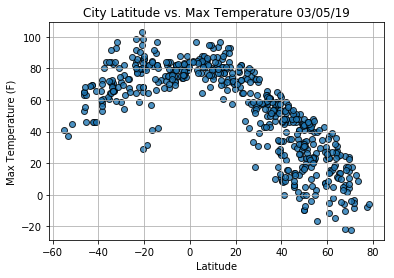

In [12]:
plt.scatter(lat, max_temp, edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WeatherPy_analysis/Latitude_MaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

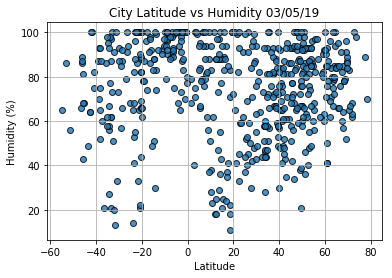

In [13]:
plt.scatter(lat, humidity, edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs Humidity {}".format(time.strftime("%x")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

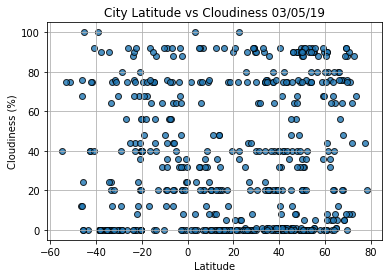

In [14]:
plt.scatter(lat, cloudiness, edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs Cloudiness {}".format(time.strftime("%x")))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

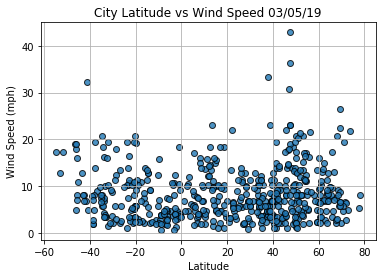

In [15]:
plt.scatter(lat, wind_speed, edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs Wind Speed {}".format(time.strftime("%x")))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

plt.show()